In [73]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction import image
from scipy.ndimage import gaussian_filter

**1.	Selecciona una imagen, cárgala en escala de grises dentro del notebook y asígnala a una variable en Python utilizando openCV. Asegúrate que sean de extensión .jpg, .jpeg o .png.**

In [10]:
imagen1 = cv.imread('../Img/gojo.jpg')

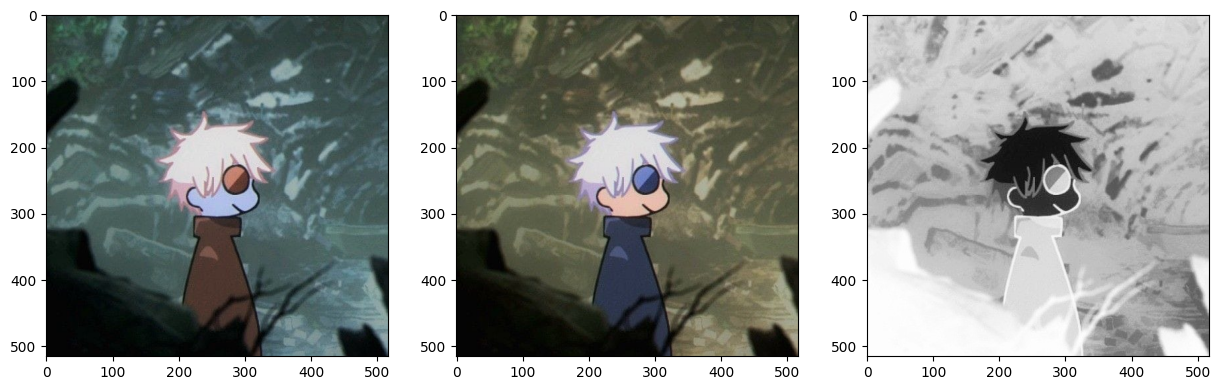

In [11]:
# Converting from BGR to RG
img1_cv2_rgb= cv.cvtColor(imagen1,cv.COLOR_BGR2RGB)
# Converting from RGB a gris
img1_cv2_gray= cv.cvtColor(img1_cv2_rgb,cv.COLOR_RGB2GRAY)
fig, axs= plt.subplots(1,3,figsize=(15, 5))
axs[0].imshow(imagen1, cmap='Greys')
axs[1].imshow(img1_cv2_rgb, cmap='Greys')
axs[2].imshow(img1_cv2_gray, cmap='Greys')
plt.show()

**2.	Divide la imagen en una lista de parches de tamaño 16 x 16 pixeles.**




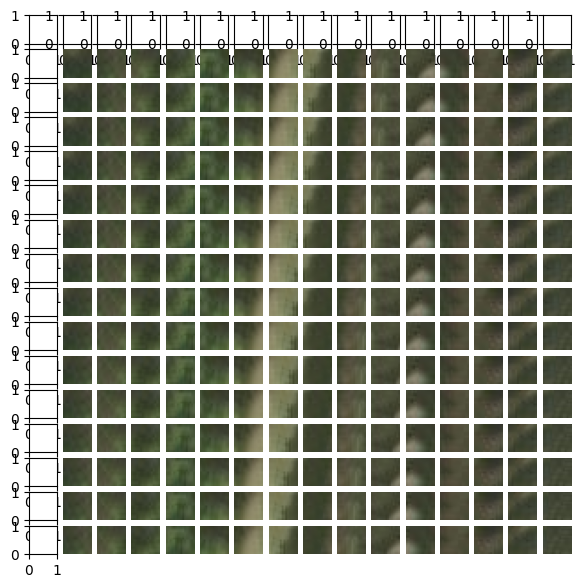

In [12]:
Partes_imagen = image.extract_patches_2d(img1_cv2_rgb, (16, 16))
#251502, 16, 16, 3
fig, axs= plt.subplots(16,16,figsize=(7, 7))
for i in range(1,16) :
  rango=(i-1)*16
  for j in range(1,16):
    axs[j,i].imshow(Partes_imagen[rango])
    axs[j,i].axis("off")
    rango+=1
plt.show()

**3.	Normaliza cada parche para que tengan media en cero, varianza unitaria y muestra 3 imágenes del listado.**

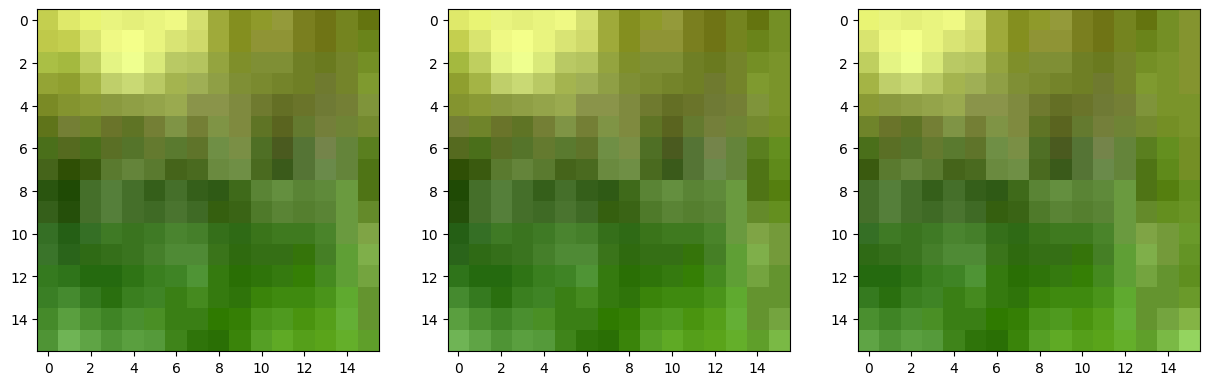

In [13]:
patches_norm = []
for i in range(len(Partes_imagen)):
  patches_norm.append(cv.normalize(Partes_imagen[i], None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F))

fig, axs= plt.subplots(1,3,figsize=(15, 5))
axs[0].imshow(patches_norm[1])
axs[1].imshow(patches_norm[2])
axs[2].imshow(patches_norm[3])
plt.show()

**4.	Con la imagen del punto 1 aplica un filtro gaussiano con un kernel de 3 x 3 y   y muestra el resultado.**

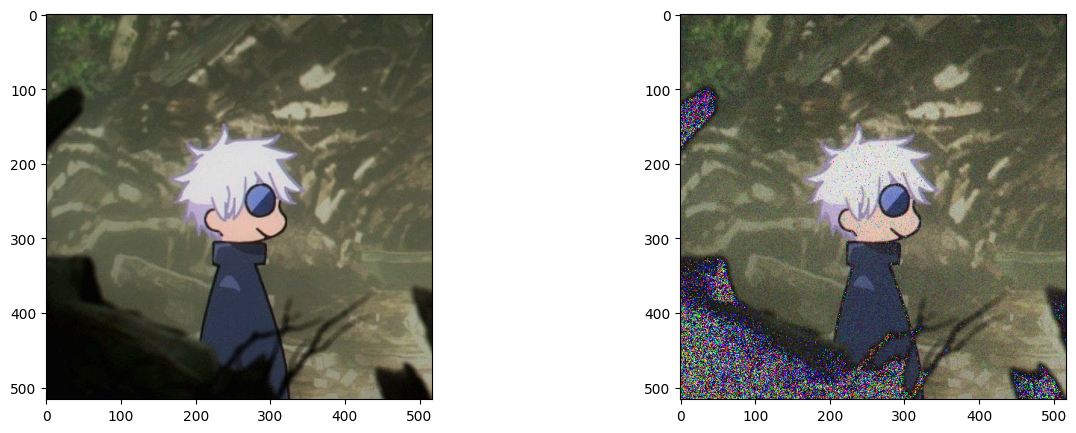

In [14]:
lines, column,valor=img1_cv2_rgb.shape
ruido = np.random.normal(0,15,(lines, column, 3)).astype(np.uint8)
imagen_ruido= img1_cv2_rgb+ruido

fig, axs= plt.subplots(1,2,figsize=(15, 5))
axs[0].imshow(img1_cv2_rgb, cmap='Greys')
axs[1].imshow(imagen_ruido, cmap='Greys')
plt.show()

**6.	Utilizando funciones de SciPy aplica 5 filtros diferentes a la imagen cargada previamente y explica sus efectos.**

In [69]:
ddepth = cv.CV_16S
abs_grad_x= cv.convertScaleAbs(cv.Sobel(src=img1_cv2_gray,ddepth=ddepth,dx=1,dy=0,ksize=3))
abs_grad_y= cv.convertScaleAbs(cv.Sobel(src=img1_cv2_gray,ddepth=ddepth,dx=0,dy=1,ksize=3))
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y,0.5,0)

In [70]:
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img_nitida = cv.filter2D(img1_cv2_rgb, -1, kernel)
img_erosion = cv.dilate(img1_cv2_rgb, kernel,iterations = 1)# Imagen dilatada
img_1_morfologico =  cv.bilateralFilter(img1_cv2_rgb, 11,120,120) #filtradas morfologico
img_filtrado = cv.filter2D(src = imagen_ruido, ddepth = -1, kernel = kernel)    #Imagen Filtrada

In [71]:
imagenes=[img1_cv2_rgb,img_nitida,img_erosion,img_1_morfologico,img_filtrado,grad]
titulos=['Normal','Imagen nitida','erosion','mofologico','filtrado','grad']

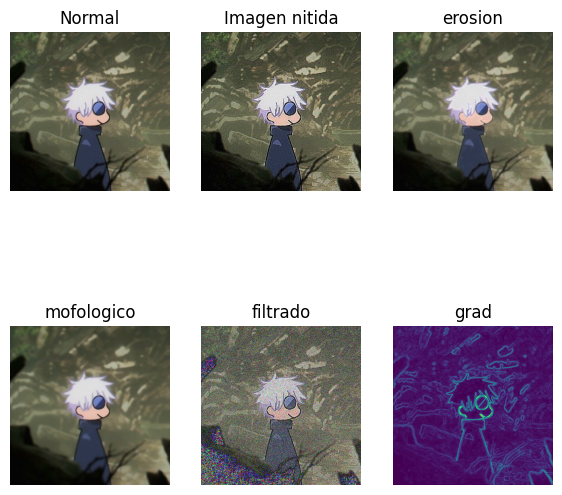

In [72]:
fig, axs= plt.subplots(2,3,figsize=(7, 7))
for i in range(0,2) :
  rango=(i)*3
  for j in range(0,3):
    axs[i,j].imshow(imagenes[rango])
    axs[i,j].axis("off")
    axs[i,j].set_title(titulos[rango])
    rango+=1
plt.show()

**7.	Utilizando funciones de SciPy aplica 5 operadores morfológicos a la imagen cargada previamente y explica sus efectos.**

In [74]:
Filtro_gauss_1 =gaussian_filter(img1_cv2_rgb, sigma =  3)
Filtro_gauss_2 =gaussian_filter(img1_cv2_rgb, sigma =  6)
Filtro_gauss_3 =gaussian_filter(img1_cv2_rgb, sigma =  9)
Filtro_gauss_4 =gaussian_filter(img1_cv2_rgb, sigma =  12)
Filtro_gauss_5 =gaussian_filter(img1_cv2_rgb, sigma =  15)

In [75]:
imagenes_gauss=[img1_cv2_rgb,Filtro_gauss_1,Filtro_gauss_2,Filtro_gauss_3,Filtro_gauss_4,Filtro_gauss_5]
titulos_gauss=['imagen rgb','Filtro con 3','Filtro con 6','Filtro con 9','Filtro con 12','Filtro con 15']

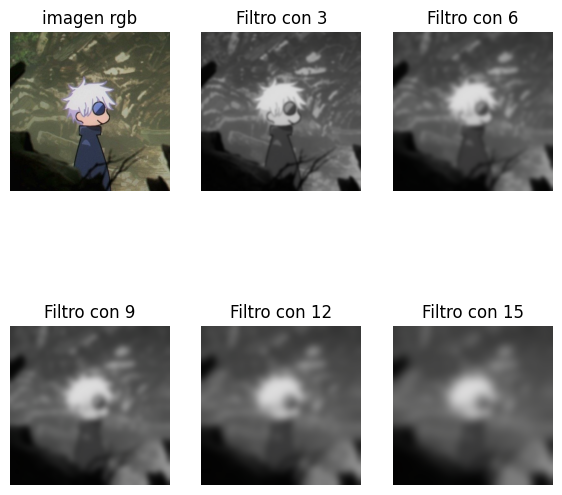

In [76]:
fig, axs= plt.subplots(2,3,figsize=(7, 7))
for i in range(0,2) :
  rango=(i)*3
  for j in range(0,3):
    axs[i,j].imshow(imagenes_gauss[rango])
    axs[i,j].axis("off")
    axs[i,j].set_title(titulos_gauss[rango])
    rango+=1
plt.show()